In [55]:
import json
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
filename1 = './CEA-2d29f9/CEA-2d29f9'
filename2 = './GSPACEAPE-08bc2b/GSPACEAPE-08bc2b'

In [24]:
df = pd.read_csv(filename1+'_nfts.csv')
df = pd.concat([pd.read_csv(filename2+'_nfts.csv'), df])

In [25]:
with open(filename1+'_nfts.json') as f:
    data = json.load(f)
with open(filename2+'_nfts.json') as f:
    data = {**data, **json.load(f)}

In [26]:
with open(filename1+'_transactions.json') as f:
    transactions = json.load(f)
with open(filename2+'_transactions.json') as f:
    transactions = {**transactions, **json.load(f)}

In [27]:
def foo(data, c=0):
    if isinstance(data, dict):
        for k, v in data.items():
            if isinstance(v, dict):
                print('\t'*c, k, type(v))
                foo(v, c+1)
            else:
                print('\t'*c, k, type(v), v)
    elif isinstance(data, list):
        for i in data:
            foo(i, c+1)

In [28]:
foo(transactions['CEA-2d29f9-01']['transactions'][0])

 txHash <class 'str'> b39faafe13e6fc6d7abf350d6b06468ee1d4b1838ca15110752b21e39dc3bd22
 gasLimit <class 'int'> 470000000
 gasPrice <class 'int'> 1000000000
 gasUsed <class 'int'> 426867069
 miniBlockHash <class 'str'> 64f77054bae8acedf101b28be7d17ac1c5b0ea162c125e479144b444a9286d6b
 nonce <class 'int'> 15
 receiver <class 'str'> erd15f6z4ykyxdps3477z59g42ga0atywyla8q5ehzx0ylvs9uuttspsz6atde
 receiverShard <class 'int'> 1
 round <class 'int'> 16205105
 sender <class 'str'> erd15f6z4ykyxdps3477z59g42ga0atywyla8q5ehzx0ylvs9uuttspsz6atde
 senderShard <class 'int'> 1
 signature <class 'str'> 7db3ae60d2a82598e46dc1c77011a61e81b728debbdc434c91cea1f2c8c60eccf33c85d2ff8c362225f0c8d98debd9fcf98ee0e7996a039aabac38cb50d1f70a
 status <class 'str'> success
 value <class 'str'> 0
 fee <class 'str'> 19561695690000000
 timestamp <class 'int'> 1693348230
 data <class 'str'> TXVsdGlFU0RUTkZUVHJhbnNmZXJAMDAwMDAwMDAwMDAwMDAwMDA1MDBlN2I2OWM3NzU2MTE5M2ZhYTBiMjU3Njk0ZGUyZjA3NzYxZGU3ZDE3ZmM1N0AxZUA0ZDQ1NTgyZDM

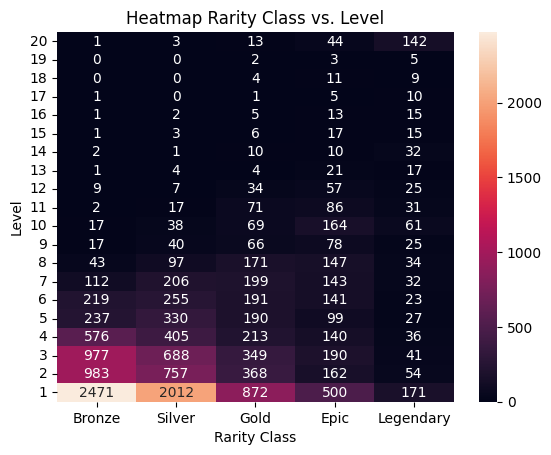

In [82]:
# plot heatmap Rarity Class vs. level on df
# display level ascending and rarity class 'bronze', 'silver', 'gold', 'epic', 'legendary'
# plot also total count of each rarity class
title = 'Heatmap Rarity Class vs. Level'
tmp = df[['Rarity Class', 'level']].copy()
tmp['count'] = 1
tmp = tmp.groupby(['Rarity Class', 'level']).sum().reset_index()
tmp = tmp.pivot(index='level', columns='Rarity Class', values='count')
# reord columns
tmp = tmp.sort_values(by='level', ascending=False)[['Bronze', 'Silver', 'Gold', 'Epic', 'Legendary']]
tmp = tmp.fillna(0)
sns.heatmap(tmp, annot=True, fmt='g')
# plt.tight_layout()
plt.yticks(rotation=0)
plt.title(title)
plt.savefig(title.replace(' ', '_')+'.png', dpi=300)
plt.xlabel('Rarity Class')
plt.ylabel('Level')
plt.show()

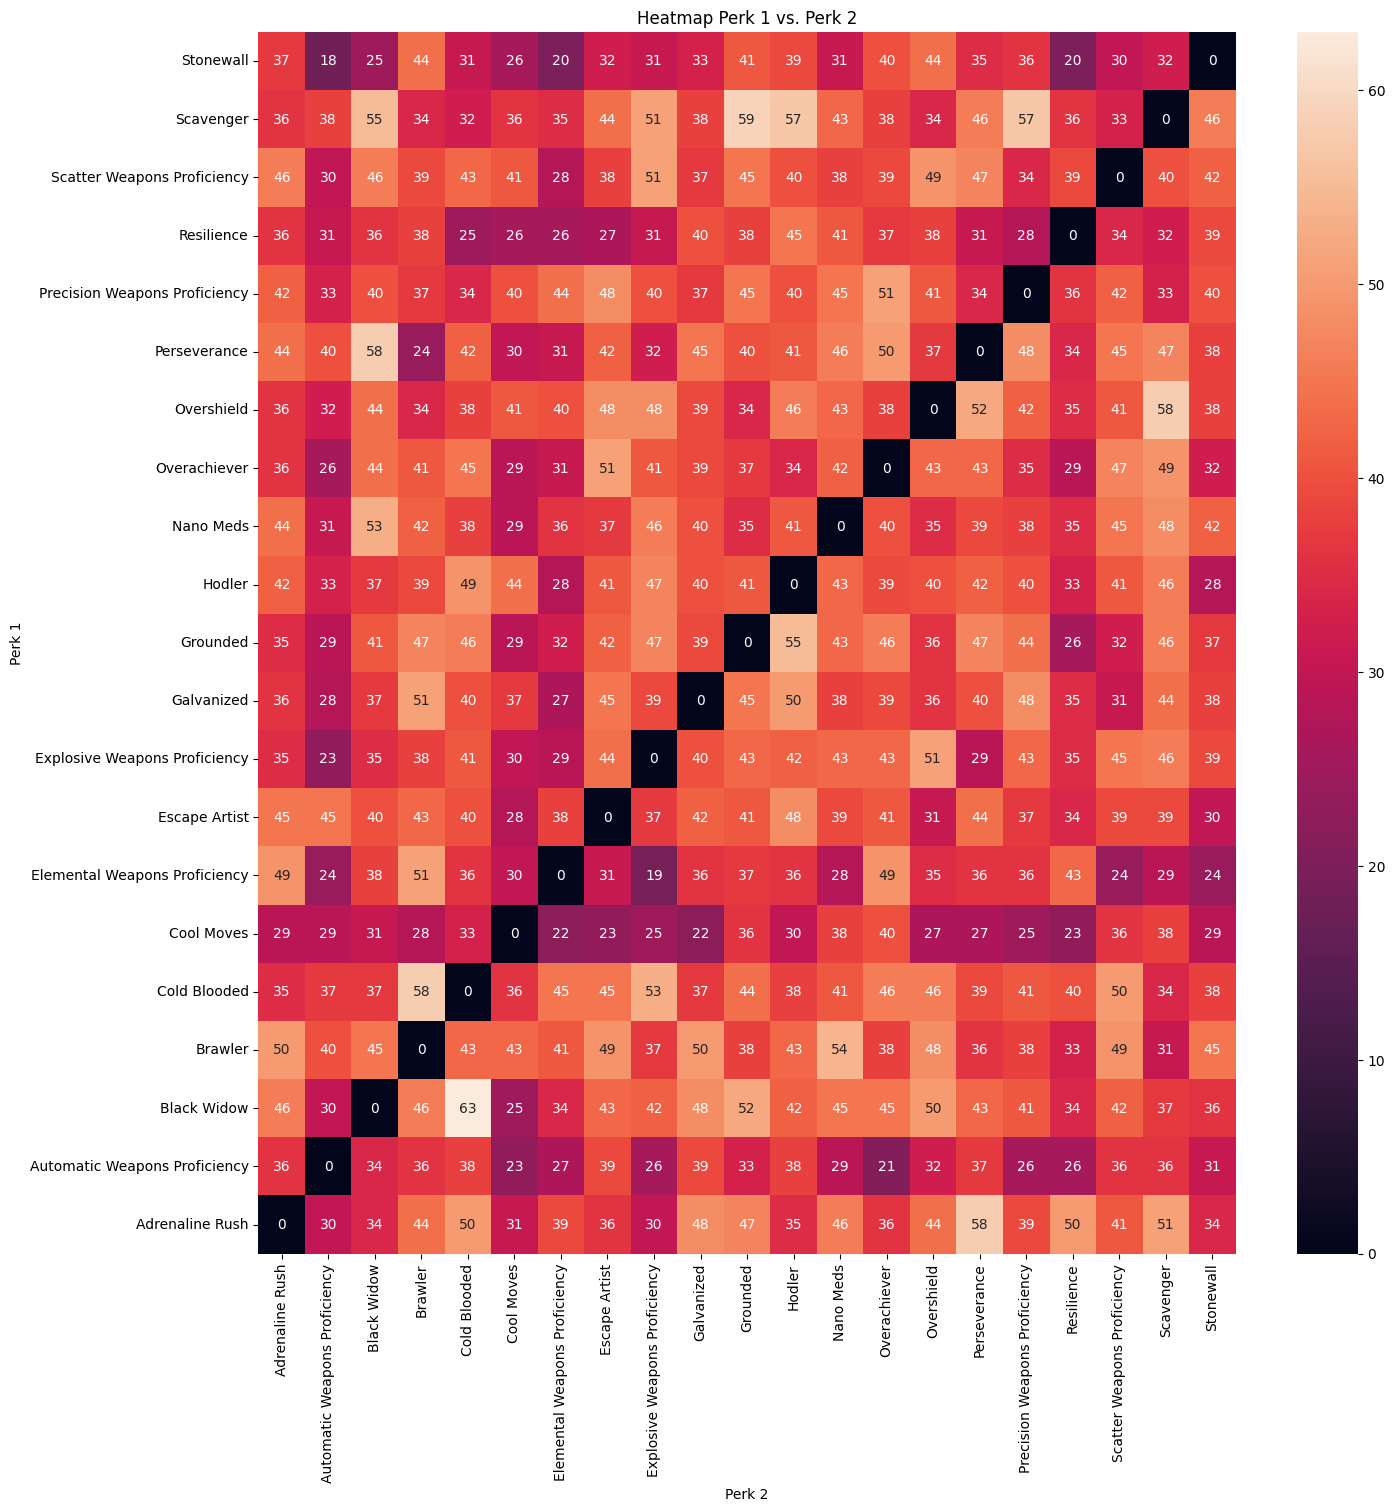

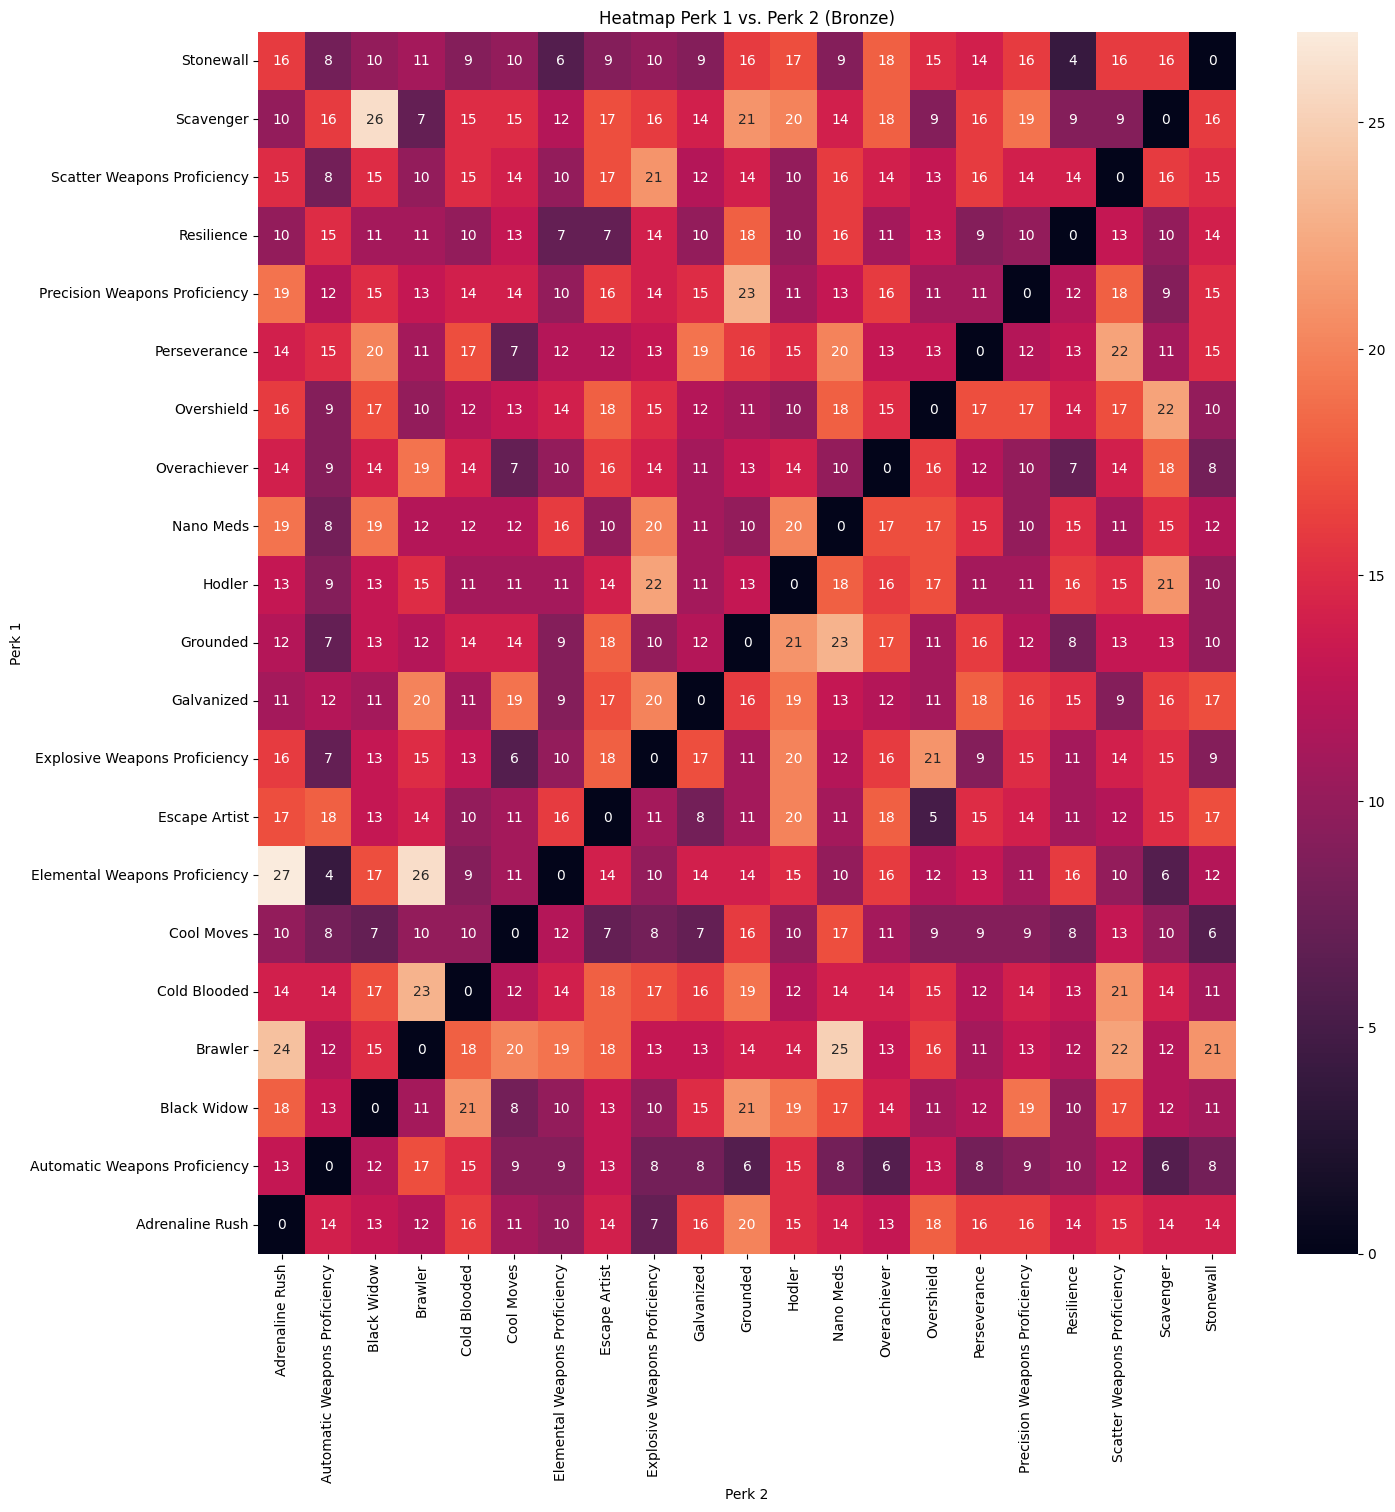

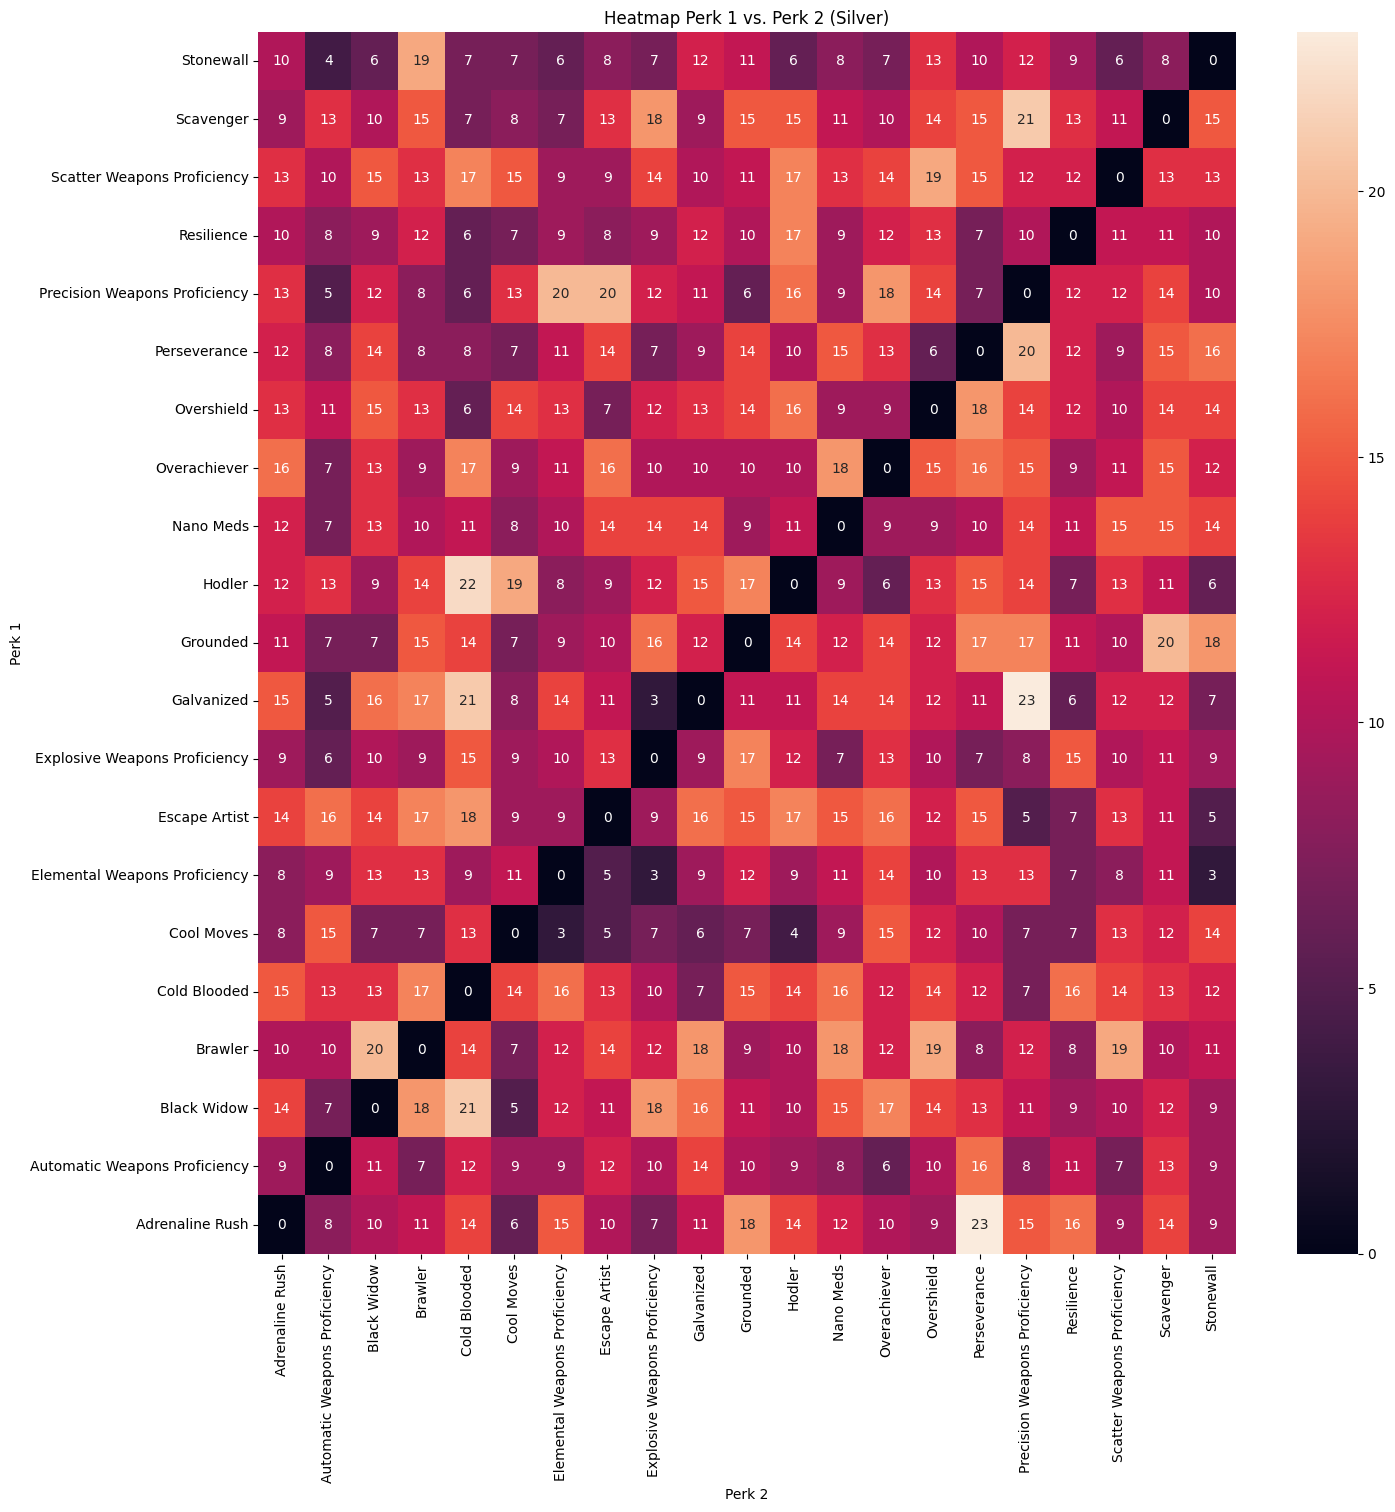

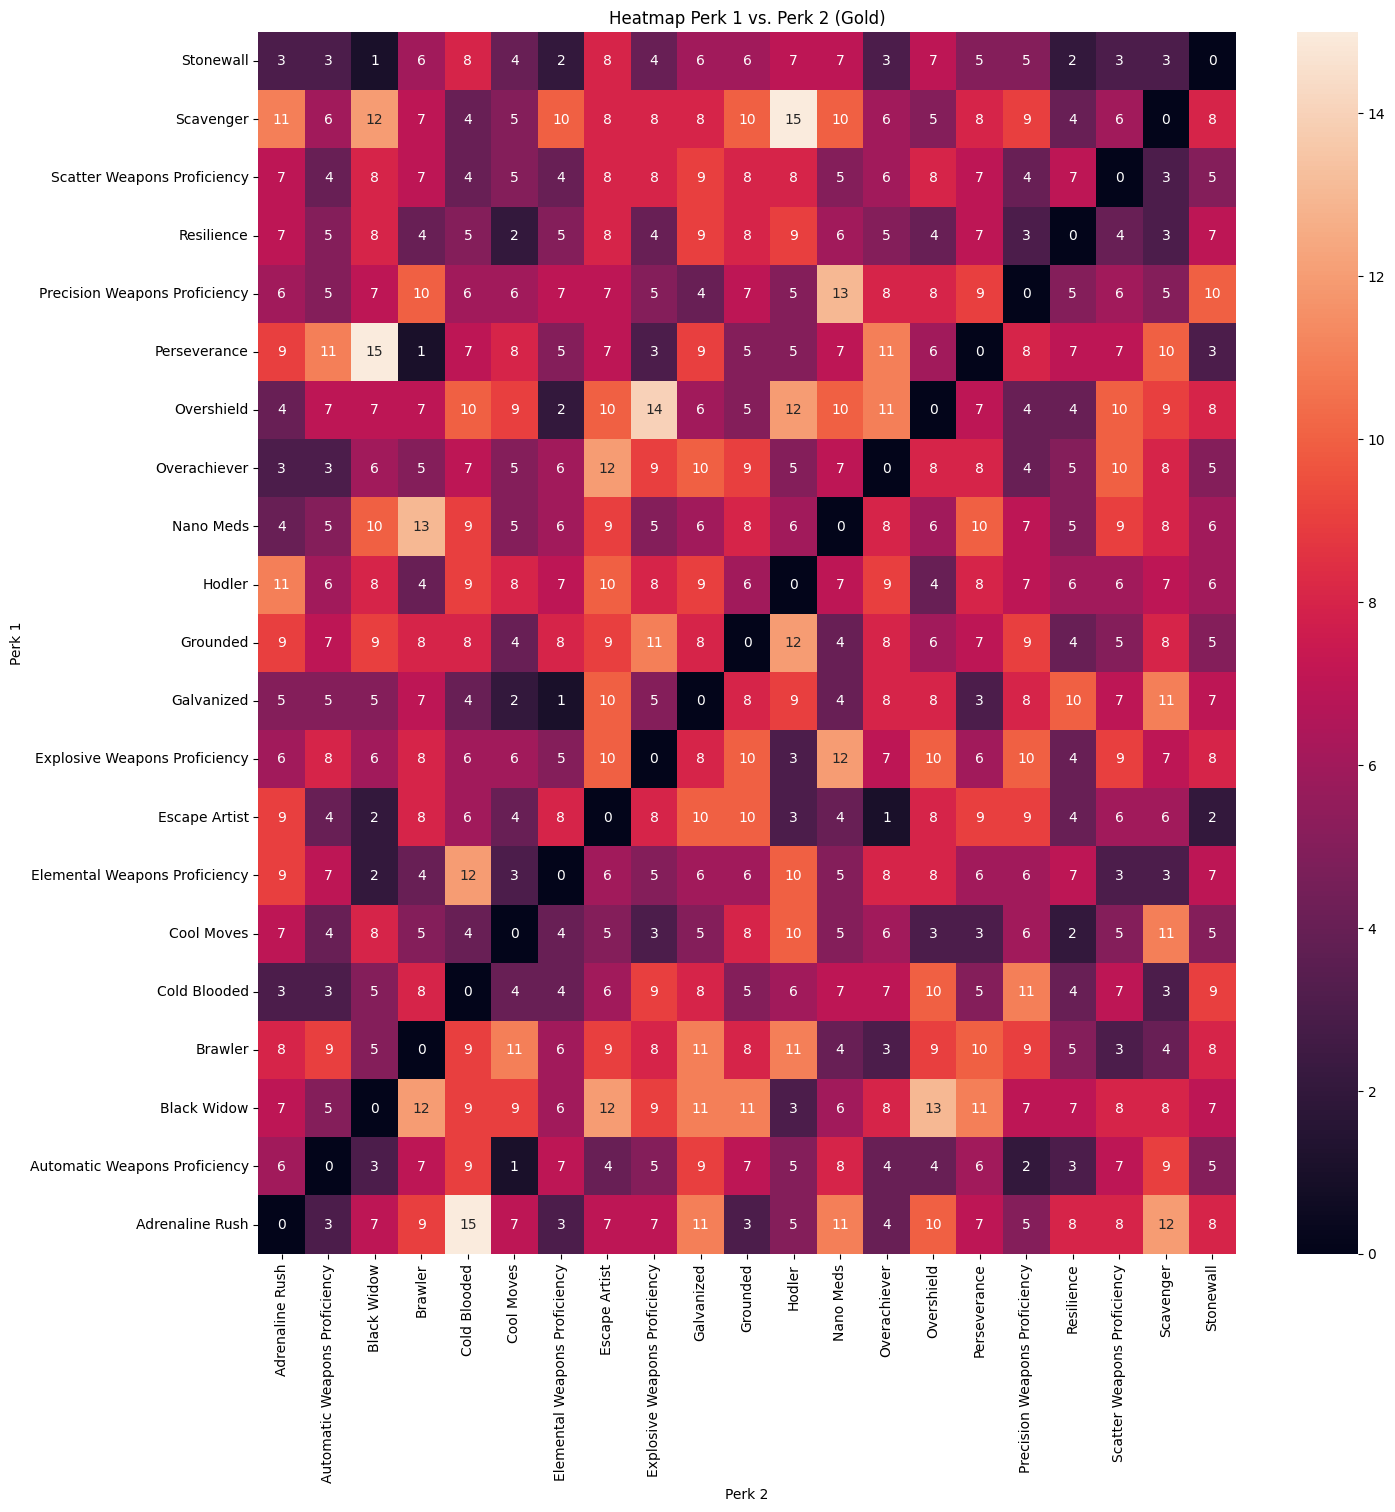

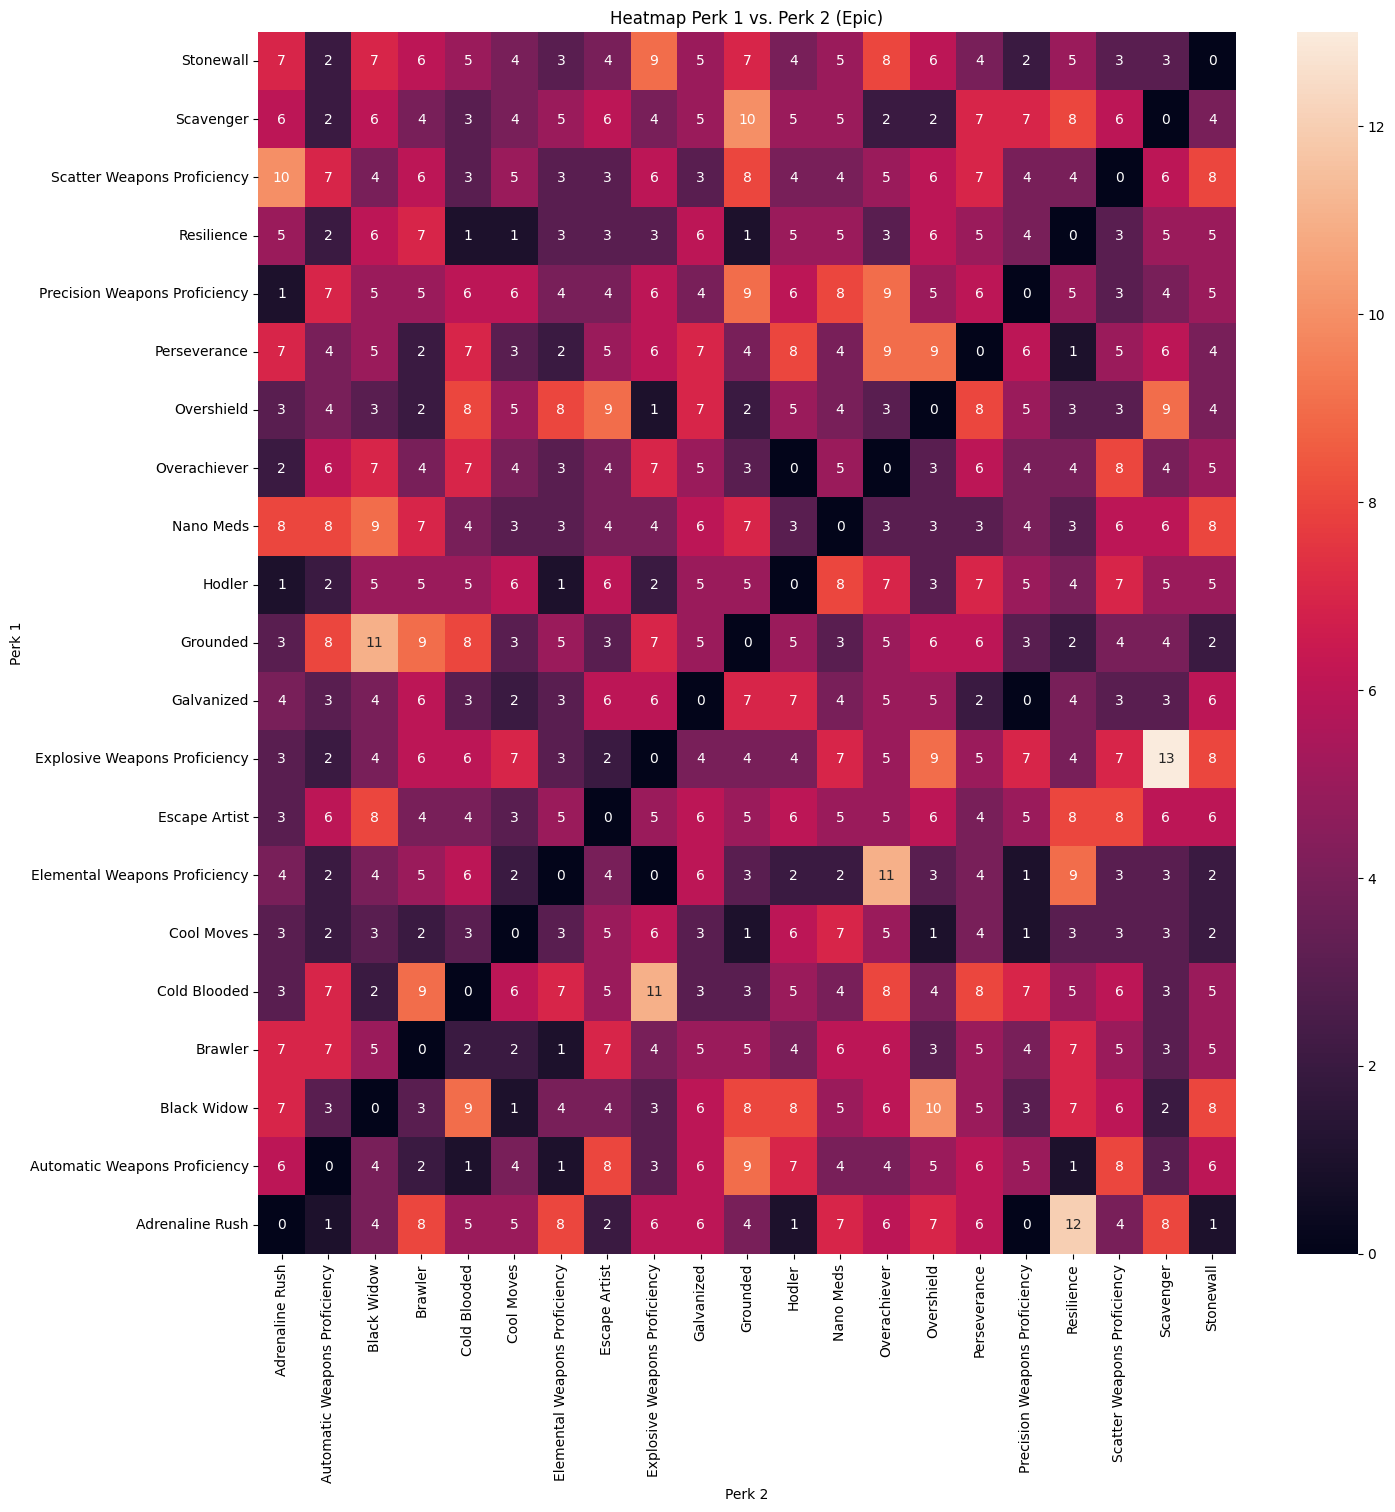

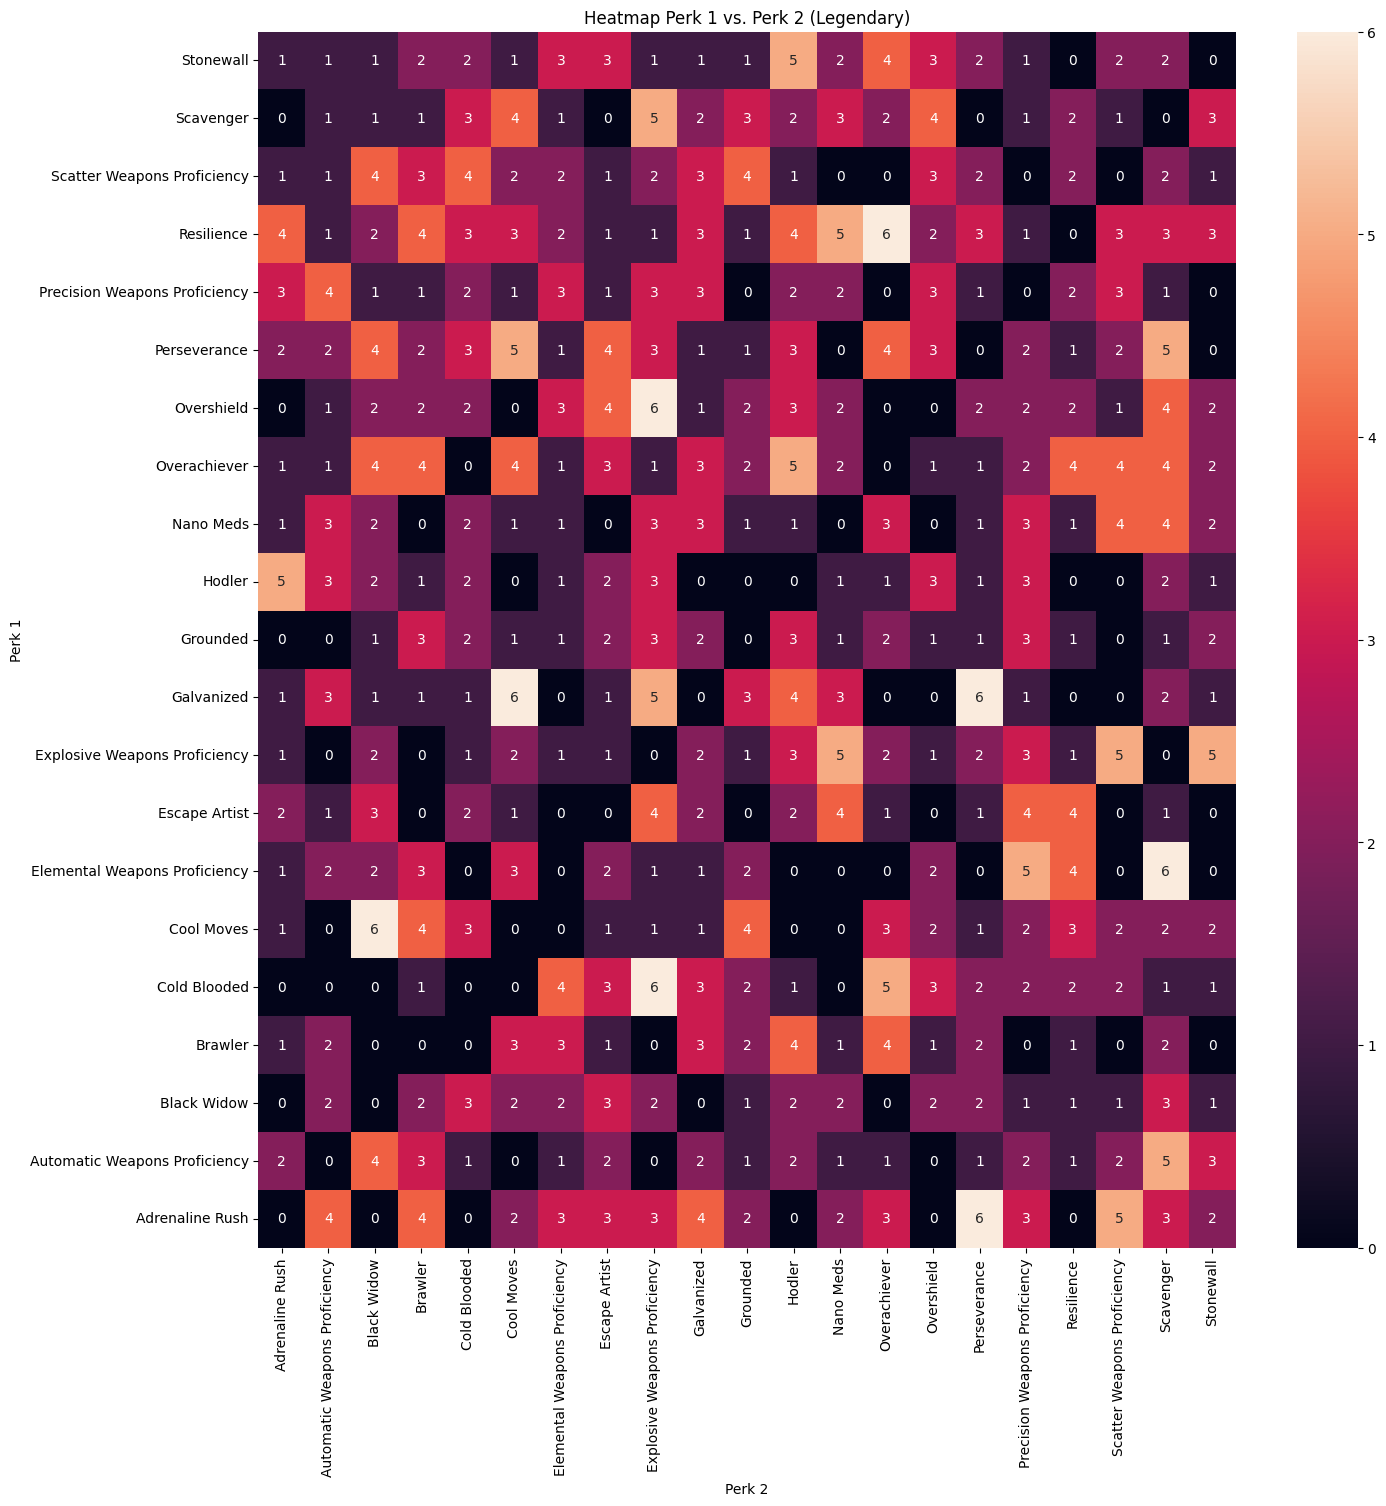

In [103]:
# plot heatmap Perk 1 vs. Perk 2 on df with  mathplotlib
def perks_heatmap(df, title='Heatmap Perk 1 vs. Perk 2'):
    tmp = df[['Perk 1', 'Perk 2']].copy()
    tmp['count'] = 1
    tmp = tmp.groupby(['Perk 1', 'Perk 2']).sum().reset_index()
    tmp = tmp.pivot(index='Perk 1', columns='Perk 2', values='count')
    # reord columns
    tmp = tmp.sort_values(by='Perk 1', ascending=False)
    tmp = tmp.fillna(0)
    plt.figure(figsize=(15, 15))
    sns.heatmap(tmp, annot=True, fmt='g')
    plt.tight_layout()
    plt.yticks(rotation=0)
    plt.title(title)
    plt.xlabel('Perk 2')
    plt.ylabel('Perk 1')
    plt.savefig(title.replace(' ', '_')+'.png', dpi=300)



    plt.show()
perks_heatmap(df)
perks_heatmap(df[df['Rarity Class']=='Bronze'], title='Heatmap Perk 1 vs. Perk 2 (Bronze)')
perks_heatmap(df[df['Rarity Class']=='Silver'], title='Heatmap Perk 1 vs. Perk 2 (Silver)')
perks_heatmap(df[df['Rarity Class']=='Gold'], title='Heatmap Perk 1 vs. Perk 2 (Gold)')
perks_heatmap(df[df['Rarity Class']=='Epic'], title='Heatmap Perk 1 vs. Perk 2 (Epic)')
perks_heatmap(df[df['Rarity Class']=='Legendary'], title='Heatmap Perk 1 vs. Perk 2 (Legendary)')

In [ ]:
df['transactionCount'] = df['identifier'].apply(lambda x: transactions[x]['count'])

In [ ]:
df[df['character_tokens']>20000].sort_values(by='character_tokens', ascending=False)[['identifier', 'character_tokens', 'transactionCount', 'level']]

,identifier,character_tokens,transactionCount,level
4763,GSPACEAPE-08bc2b-24bb,183931,18,11
10344,GSPACEAPE-08bc2b-015b,55900,16,16
12274,GSPACEAPE-08bc2b-08e5,39392,32,13
4260,GSPACEAPE-08bc2b-26b2,33524,11,12
6696,GSPACEAPE-08bc2b-1d2e,31250,1,8
11786,GSPACEAPE-08bc2b-06fd,30714,45,10
9583,GSPACEAPE-08bc2b-11e7,30700,5,10
6702,GSPACEAPE-08bc2b-1d28,30150,27,11
2982,GSPACEAPE-08bc2b-2bb0,29724,2,13
3540,GSPACEAPE-08bc2b-2982,29470,0,12


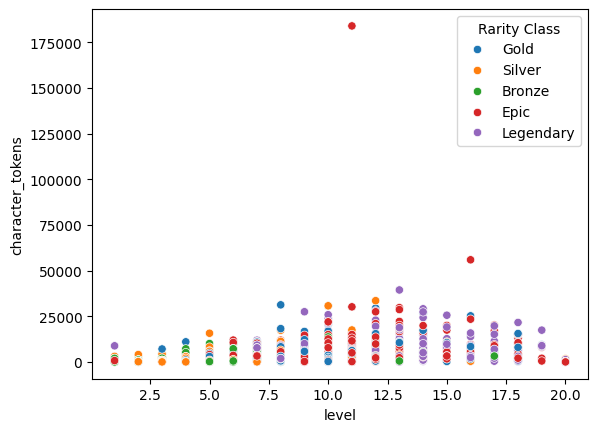

In [ ]:
# plot scatterplot character_tokens vs. level on df
from matplotlib import pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='level', y='character_tokens', hue='Rarity Class')
plt.show()

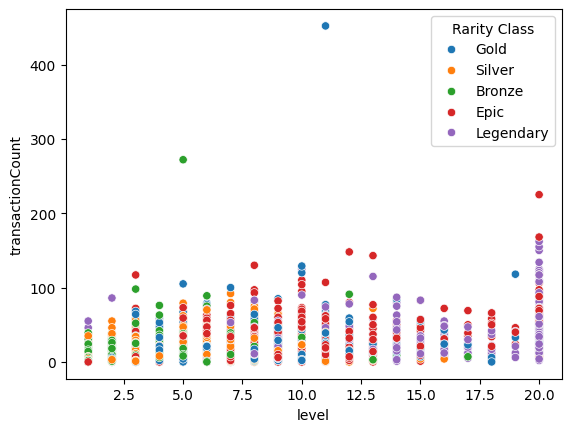

In [ ]:
# plort transactionCount vs. level
sns.scatterplot(data=df, x='level', y='transactionCount', hue='Rarity Class')
plt.show()

In [ ]:
df[(df['Rarity Class']=='Bronze')&(df['level']==20)]

,identifier,nonce,originalUrl,thumbnailUrl,id,rank,Species,Rarity Class,Head,Face,...,Perseverance,Escape Artist,Scavenger,Cool Moves,Brawler,Automatic Weapons Proficiency,Scatter Weapons Proficiency,Precision Weapons Proficiency,Explosive Weapons Proficiency,Elemental Weapons Proficiency
11878,GSPACEAPE-08bc2b-0759,1881,https://ipfs.io/ipfs/bafybeicsa2ygmod3btvjtdvf...,https://media.elrond.com/nfts/thumbnail/GSPACE...,11706,13848,Genesis Space Ape,Bronze,Default,NaN,...,2,4,2,2,2,0,0,0,0,0


In [ ]:
import pprint
pprint.pprint(transactions['CEA-2d29f9-01']['transactions'][0], indent=4)

{   'action': {   'arguments': {   'functionArgs': [   '4953424f542d613430613761',
                                                       '01',
                                                       '01',
                                                       '5850414348494556452d356130353139',
                                                       '01',
                                                       '01',
                                                       '4d45582d343535633537',
                                                       '',
                                                       '0c83297a1bd5eb770000',
                                                       '4d45582d343535633537',
                                                       '',
                                                       '0c83297a1bd5eb770000',
                                                       '4350412d313561656530',
                                                       '02',
        

In [ ]:
foo(transactions['CEA-2d29f9-01']['transactions'][0])

 txHash <class 'str'> b39faafe13e6fc6d7abf350d6b06468ee1d4b1838ca15110752b21e39dc3bd22
 gasLimit <class 'int'> 470000000
 gasPrice <class 'int'> 1000000000
 gasUsed <class 'int'> 426867069
 miniBlockHash <class 'str'> 64f77054bae8acedf101b28be7d17ac1c5b0ea162c125e479144b444a9286d6b
 nonce <class 'int'> 15
 receiver <class 'str'> erd15f6z4ykyxdps3477z59g42ga0atywyla8q5ehzx0ylvs9uuttspsz6atde
 receiverShard <class 'int'> 1
 round <class 'int'> 16205105
 sender <class 'str'> erd15f6z4ykyxdps3477z59g42ga0atywyla8q5ehzx0ylvs9uuttspsz6atde
 senderShard <class 'int'> 1
 signature <class 'str'> 7db3ae60d2a82598e46dc1c77011a61e81b728debbdc434c91cea1f2c8c60eccf33c85d2ff8c362225f0c8d98debd9fcf98ee0e7996a039aabac38cb50d1f70a
 status <class 'str'> success
 value <class 'str'> 0
 fee <class 'str'> 19561695690000000
 timestamp <class 'int'> 1693348230
 data <class 'str'> TXVsdGlFU0RUTkZUVHJhbnNmZXJAMDAwMDAwMDAwMDAwMDAwMDA1MDBlN2I2OWM3NzU2MTE5M2ZhYTBiMjU3Njk0ZGUyZjA3NzYxZGU3ZDE3ZmM1N0AxZUA0ZDQ1NTgyZDM

In [ ]:
talents = ['Overachiever', 'Hodler', 'Grounded', 'Stonewall', 'Adrenaline Rush',
       'Overshield', 'Black Widow', 'Galvanized', 'Nano Meds', 'Resilience',
       'Cold Blooded', 'Perseverance', 'Escape Artist', 'Scavenger',
       'Cool Moves', 'Brawler', 'Automatic Weapons Proficiency',
       'Scatter Weapons Proficiency', 'Precision Weapons Proficiency',
       'Explosive Weapons Proficiency', 'Elemental Weapons Proficiency']

In [ ]:
# heatmap of talents frequency
df_talents = df[talents]
df_talents = df_talents.fillna(0)
df_talents = df_talents.astype(int)
df_talents = df_talents.sum(axis=0)
df_talents = df_talents.sort_values(ascending=False)
df_talents = df_talents.to_frame()
df_talents.columns = ['frequency']
df_talents = df_talents.reset_index()
df_talents.columns = ['talent', 'frequency']

In [ ]:
d = {x['talent']:x['frequency'] for x in df_talents.to_dict('records')}
for _, row in df.iterrows():
    d[row['Perk 1']] -= 10
    d[row['Perk 2']] -= 10

In [ ]:
d

{'Brawler': 2134,
 'Scavenger': 1837,
 'Black Widow': 1872,
 'Overshield': 2143,
 'Nano Meds': 2158,
 'Perseverance': 2055,
 'Cold Blooded': 1745,
 'Hodler': 1789,
 'Adrenaline Rush': 1779,
 'Overachiever': 1962,
 'Galvanized': 2027,
 'Escape Artist': 1892,
 'Grounded': 639,
 'Scatter Weapons Proficiency': 569,
 'Precision Weapons Proficiency': 523,
 'Explosive Weapons Proficiency': 599,
 'Resilience': 2089,
 'Stonewall': 582,
 'Cool Moves': 1807,
 'Elemental Weapons Proficiency': 551,
 'Automatic Weapons Proficiency': 533}

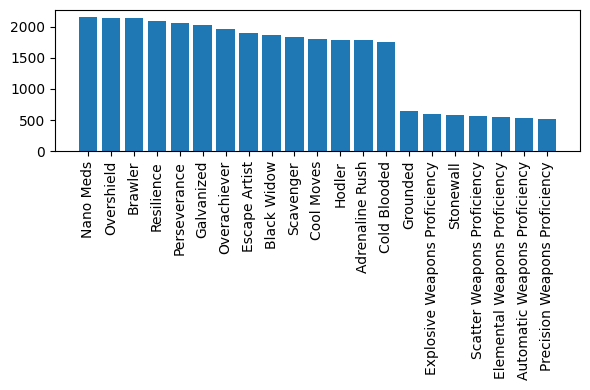

In [ ]:
# plot histogram of talents frequency d = {talent: frequency} 
import matplotlib.pyplot as plt

# sort by frequency
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(d.keys(), d.values())
# label 90 degrees
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: xlabel='rank', ylabel='nonce'>

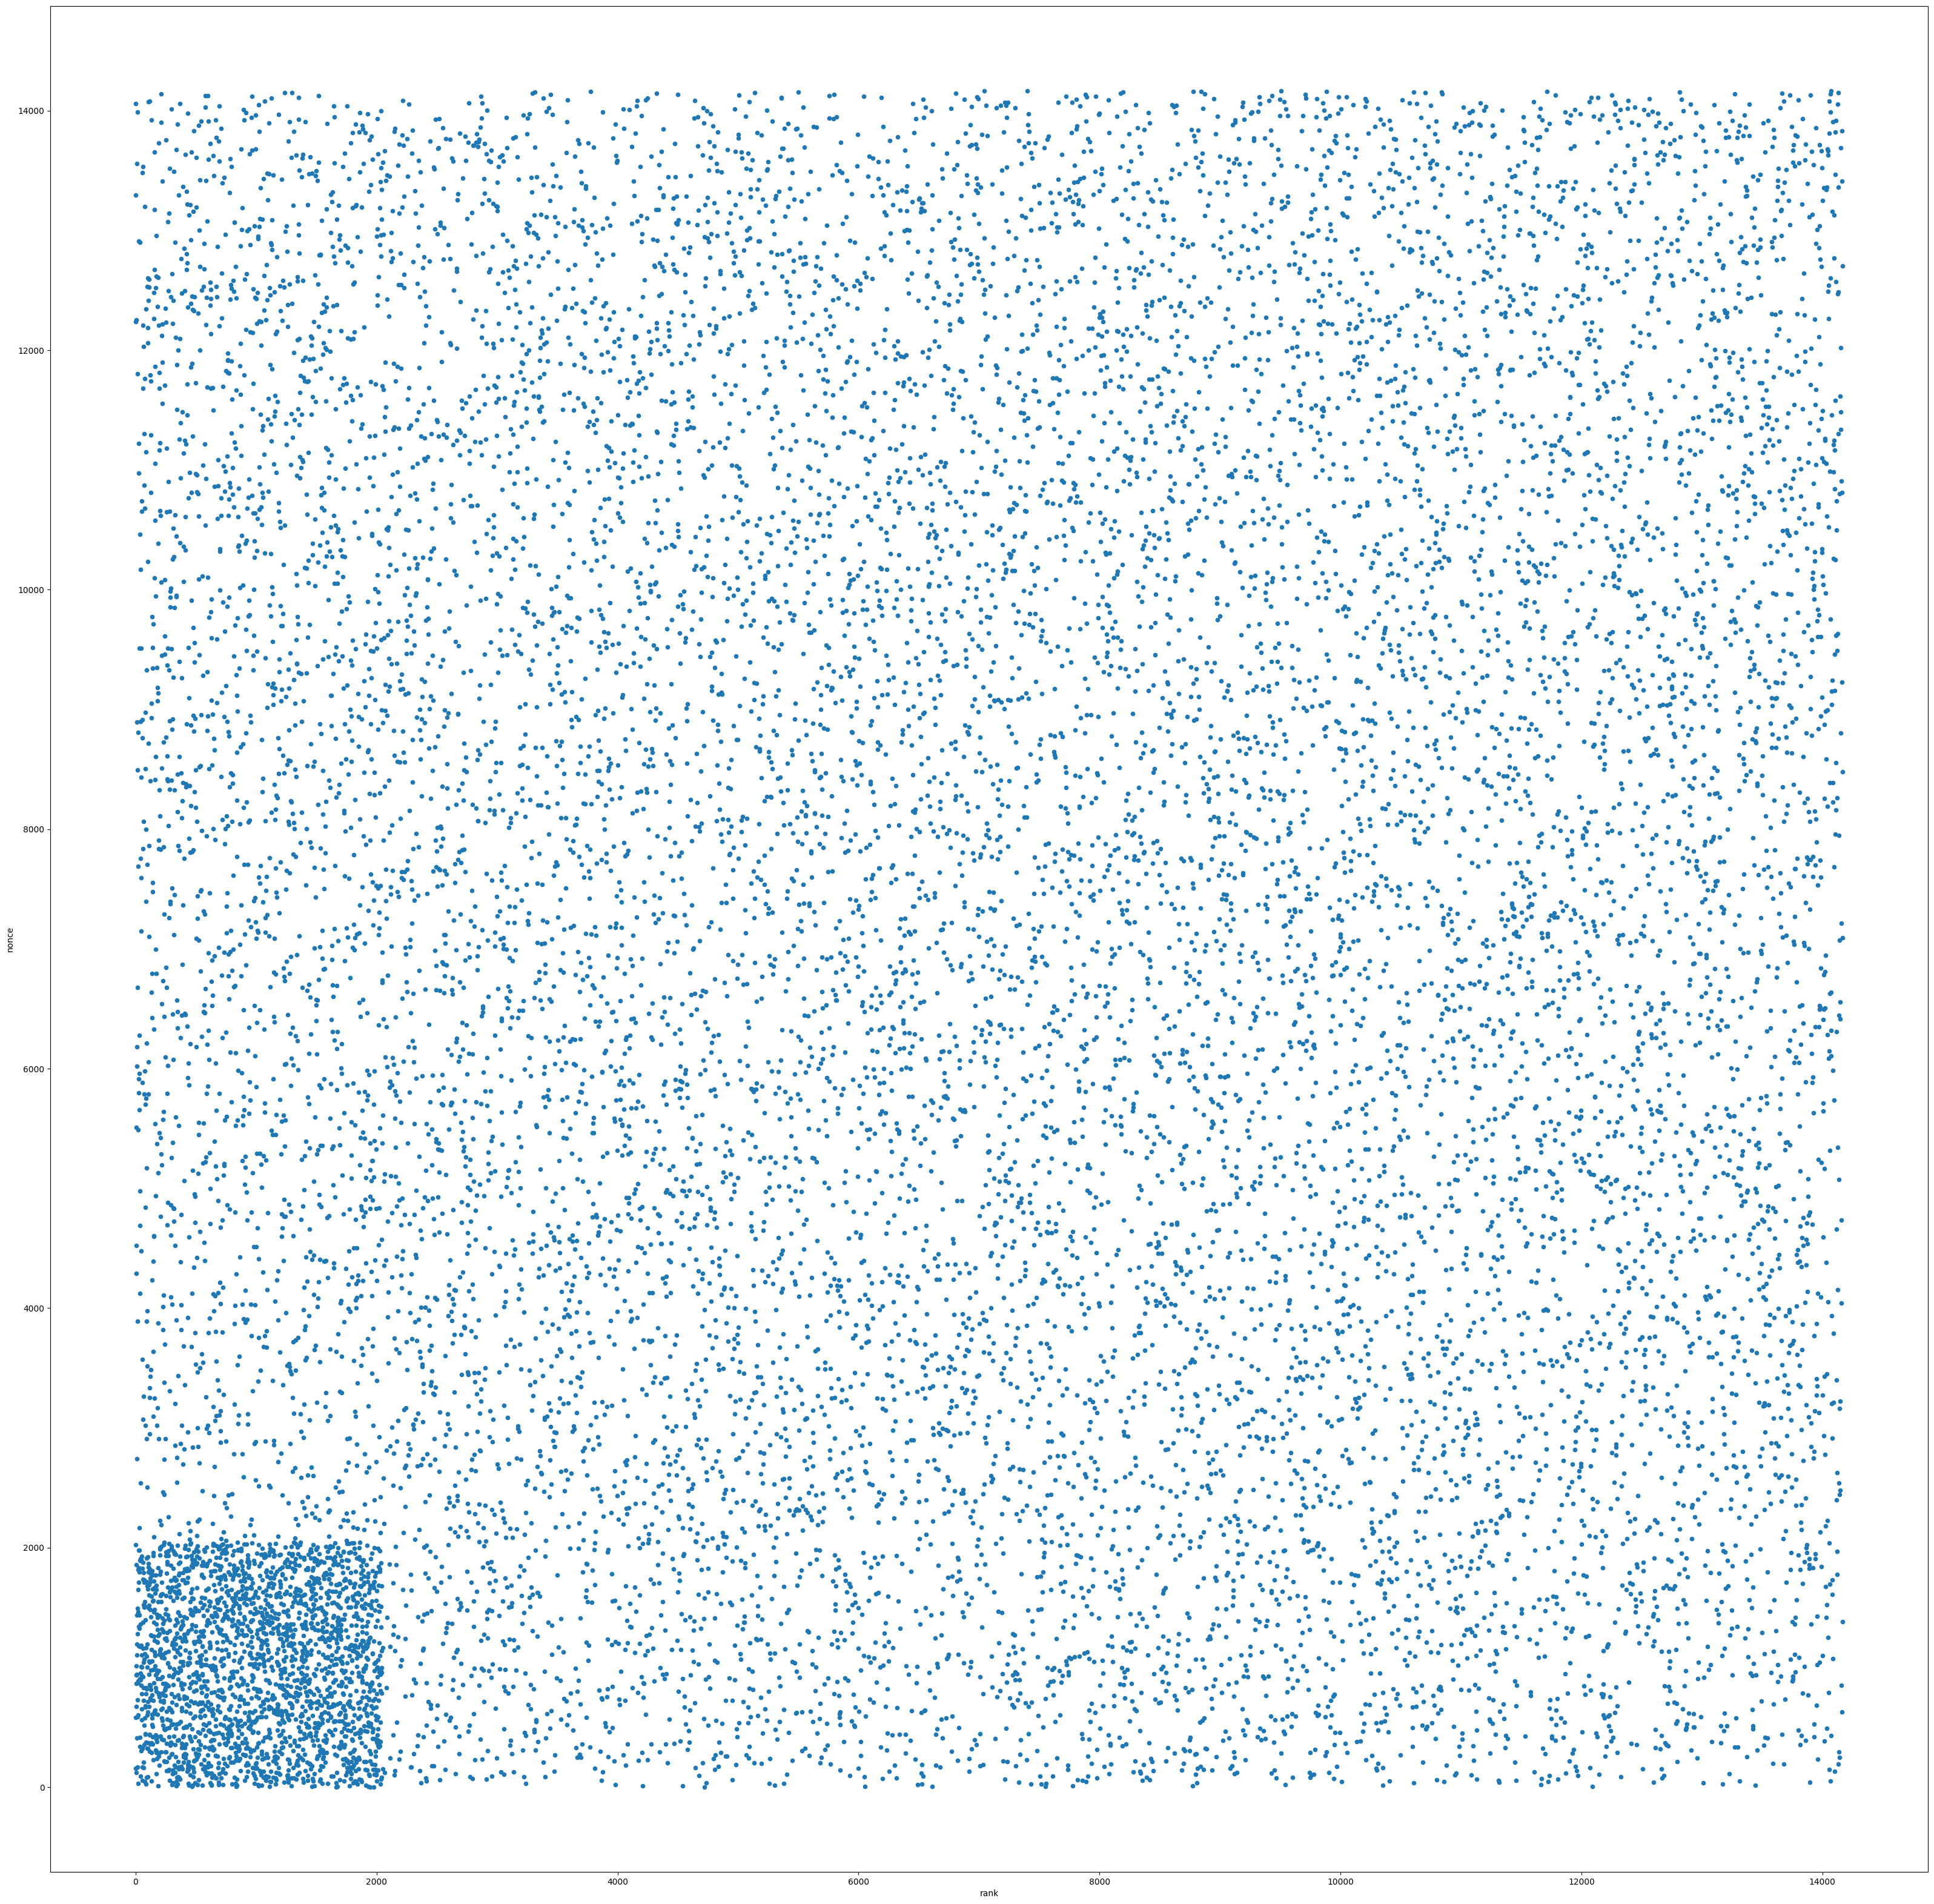

In [ ]:
# scatter plot rank vs nonce figure size 40x40
df.plot.scatter(x='rank', y='nonce', figsize=(40, 40))